In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

output_domain_size_dict = {
    "smartgrid-1": (3, 12),
    "prob-termination-5": (6, 10),
    "prob-termination-7": (8, 10),
    "smartgrid-2": (9, 12),
    "prob-termination-9": (10, 10),
    "prob-termination-12": (13, 20),
    "reservoir-4": (16, 4),
    "window-20": (20, 20),
    "window-24": (24, 24),
    "smartgrid-3": (27, 12),
    "window-28": (28, 28),
    "window-32": (32, 32),
    "reservoir-6": (64, 8),
    "smartgrid-4": (81, 12),
    "smartgrid-5": (243, 12),
    "reservoir-8": (256, 16),
    "random-walk-3": (500, 24),
    "random-walk-5": (500, 31),
    "random-walk-7": (500, 33),
    "random-walk-14": (500, 40),
    "reservoir-10": (1024, 32),
    "reservoir-12": (4096, 64),
}

method_order = [
    "empirical",
    "ChaoFON",
    "ChaoFRN",
    "ChaoION",
    "ChaoIRN",
    "miller",
    "ChaoFOM",
    "ChaoFRM",
    "ChaoIOM",
    "ChaoIRM",
    "HyLeak"
]

# Correlation test

In [2]:
corr_data = []
for subject in output_domain_size_dict.keys():
    data_path = f"../result/time-merged-{subject}-i-xy.csv"
    data = pd.read_csv(data_path)
    data_melt = data.melt(
        id_vars=["Nx", "trial"], var_name="method", value_name="time (s)"
    )
    data_melt = data_melt.groupby(["Nx", "method"]).mean().reset_index()
    data_melt = data_melt[data_melt["method"] == "ChaoIRM"]
    num_x = output_domain_size_dict[subject][0]
    num_xy = (
        output_domain_size_dict[subject][0]
        * output_domain_size_dict[subject][1]
    )
    for row in data_melt.iterrows():
        chao_time = row[1]["time (s)"]
        Nx = row[1]["Nx"]
        corr_data.append(
            (chao_time, Nx * output_domain_size_dict[subject][0], num_x, num_xy)
        )
corr_df = pd.DataFrame(
    corr_data, columns=["time", "num_samples", "num_x", "num_xy"]
)
corr_df


,time,num_samples,num_x,num_xy
0,0.347579,18,3,36
1,0.353438,36,3,36
2,0.385446,72,3,36
3,0.164910,180,3,36
4,0.404041,30,6,60
...,...,...,...,...
83,1111.407543,163840,1024,32768
84,5097.746400,131072,4096,262144
85,6566.074327,262144,4096,262144
86,8154.606997,524288,4096,262144


Pearson correlation


,time,num_samples,num_x,num_xy
time,1.000000,0.852032,0.957199,0.976212
num_samples,0.852032,1.000000,0.748731,0.758060
num_x,0.957199,0.748731,1.000000,0.987702
num_xy,0.976212,0.758060,0.987702,1.000000


y=2.73e-02x+-61.56, r=0.98, p=7.04e-59


Text(0.5, 0.5, 'y=0.03x+-61.56, r=0.98, p=0.00')

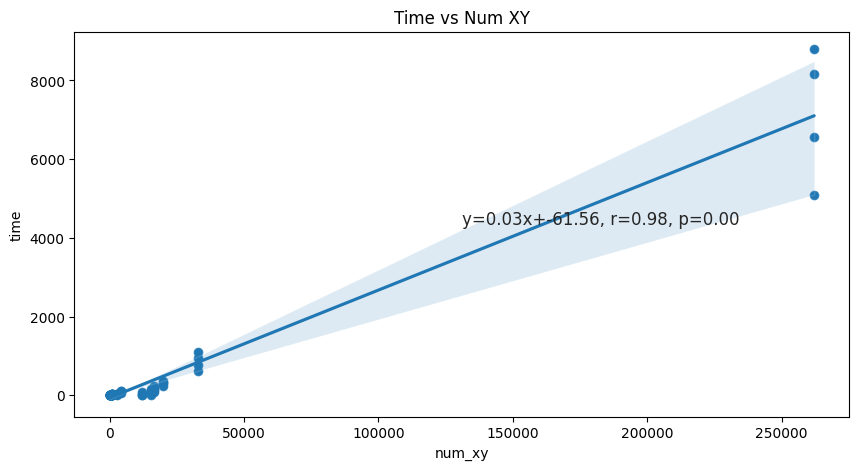

In [3]:
print("Pearson correlation")
display(corr_df.corr(method="pearson"))

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.scatterplot(
    x="num_xy",
    y="time",
    data=corr_df,
    ax=ax,
)
ax.set_xlabel("Num XY")
ax.set_ylabel("Time (s)")
ax.set_title("Time vs Num XY")
slope, intercept, r_value, p_value, std_err = stats.linregress(
    corr_df["num_xy"], corr_df["time"]
)
print(f"y={slope:.2e}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2e}")
sns.regplot(
    x="num_xy",
    y="time",
    data=corr_df,
    ax=ax,
    line_kws={
        "label": f"y={slope:.2f}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2f}"
    },
)
ax.text(
    0.5,
    0.5,
    f"y={slope:.2f}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2f}",
    transform=ax.transAxes,
)


In [4]:
subject_name_map = {
    "smartgrid-1": "SG1",
    "smartgrid-2": "SG2",
    "prob-termination-5": "PT5",
    "prob-termination-7": "PT7",
    "prob-termination-9": "PT9",
    "prob-termination-12": "PT12",
    "smartgrid-3": "SG3",
    "reservoir-6": "RV6",
    "window-20": "WD20",
    "window-24": "WD24",
    "window-28": "WD28",
    "window-32": "WD32",
    "smartgrid-4": "SG4",
    "smartgrid-5": "SG5",
    "reservoir-8": "RV8",
    "random-walk-14": "RW14",
    "random-walk-3": "RW3",
    "random-walk-5": "RW5",
    "random-walk-7": "RW7",
    "reservoir-10": "RV10",
    "reservoir-4": "RV4",
    "reservoir-12": "RV12",
}

df_list = []

for subject in output_domain_size_dict.keys():
    subject_name = subject_name_map[subject]
    data_path = f"../result/time-merged-{subject}-i-xy.csv"
    data = pd.read_csv(data_path)
    data_melt = data.melt(
        id_vars=["Nx", "trial"], var_name="method", value_name="time (s)"
    )
    method_order_s = method_order.copy()
    data_melt["subject"] = subject_name
    df_list.append(data_melt)
total_df = pd.concat(df_list)
total_df = total_df.set_index(["subject", "Nx"]).drop(columns=["trial"])
total_df = total_df.groupby(["subject", "Nx", "method"]).mean()

# rename methods, reorder methods
method_order = [
    "Empirical",
    "FON",
    "FRN",
    "SON",
    "SRN",
    "Miller",
    "FOM",
    "FRM",
    "SOM",
    "SRM",
    "HyLeak",
]

method_rename = {
    "empirical": "Empirical",
    "miller": "Miller",
    "HyLeakH": "HyLeak",
    "ChaoFON": "FON",
    "ChaoFRN": "FRN",
    "ChaoION": "SON",
    "ChaoIRN": "SRN",
    "ChaoFOM": "FOM",
    "ChaoFRM": "FRM",
    "ChaoIOM": "SOM",
    "ChaoIRM": "SRM",
}
total_df = total_df.rename(index=method_rename, level="method")
total_df = total_df.reindex(method_order, level="method")

# compute method's min, mean, median, max time
print(total_df.groupby(["method"]).describe())

          time (s)                                                            \
             count         mean           std       min       25%        50%   
method                                                                         
Empirical     88.0     0.032894      0.112879  0.000153  0.000357   0.002049   
FOM           88.0  2257.712271  10442.578042  0.671894  3.366798  29.128059   
FON           88.0  2492.733283  11743.077857  0.668016  3.528041  30.670573   
FRM           88.0  2941.412789  13562.886506  0.656730  3.061353  28.732272   
FRN           88.0  3053.792240  14221.656352  0.662217  3.342610  29.517623   
HyLeak        88.0     2.631383     10.970827  0.071833  0.157458   0.250217   
Miller        88.0     0.032797      0.112138  0.000178  0.000401   0.002073   
SOM           88.0   398.424913   1521.301352  0.038650  1.135774   9.314372   
SON           88.0   382.028407   1478.168115  0.034079  1.124737   9.332095   
SRM           88.0   399.563237   1525.7

In [5]:
# leave only second smallest Nx
total_df = total_df.reset_index()
total_df = total_df.sort_values(by=["Nx"])
g05 = total_df.groupby(["subject", "method"]).nth(0)
g1 = total_df.groupby(["subject", "method"]).nth(1)
g2 = total_df.groupby(["subject", "method"]).nth(2)
g5 = total_df.groupby(["subject", "method"]).nth(3)
g05["sr"] = 0.5
g1["sr"] = 1
g2["sr"] = 2
g5["sr"] = 5
merge_df = g1 #pd.concat([g05, g1, g2, g5])
# drop Nx column
merge_df = merge_df.drop(columns=["Nx"])
merge_df = merge_df.reset_index(drop=True)
merge_df["method"] = pd.Categorical(merge_df["method"], method_order)
# display all rows
pd.set_option("display.max_rows", None)
display(merge_df[merge_df["method"] == "FRN"])
pd.reset_option("display.max_rows")

/tmp/ipykernel_3305351/2344139398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g05["sr"] = 0.5
/tmp/ipykernel_3305351/2344139398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1["sr"] = 1
/tmp/ipykernel_3305351/2344139398.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,subject,method,time (s),sr
3,RV4,FRN,1.739944,1
20,RV6,FRN,22.709120,1
23,PT9,FRN,2.248052,1
37,PT5,FRN,1.246981,1
46,PT7,FRN,1.826129,1
68,SG2,FRN,2.681022,1
73,SG5,FRN,205.083015,1
74,SG1,FRN,0.827106,1
84,SG3,FRN,9.604236,1
108,SG4,FRN,39.625071,1


/tmp/ipykernel_3305351/3375288318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["method"] = pd.Categorical(sub_df["method"], ["FON", "FRN", "FOM", "FRM", "SON", "SRN", "SOM", "SRM"])


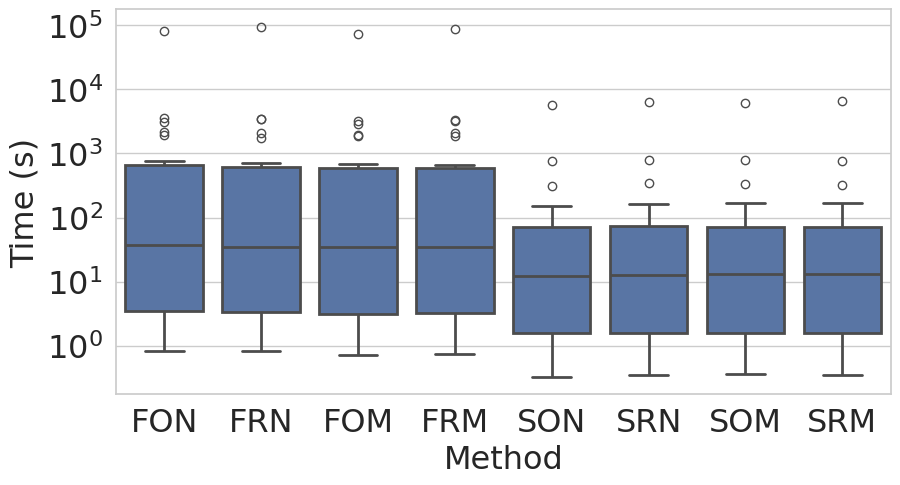

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sub_df = merge_df[~merge_df["method"].isin(["Empirical", "Miller", "HyLeak", "HyLeakC"])]
sub_df["method"] = pd.Categorical(sub_df["method"], ["FON", "FRN", "FOM", "FRM", "SON", "SRN", "SOM", "SRM"])
sns.boxplot(
    sub_df,
    x="method",
    y="time (s)",
    ax=ax,
    linewidth=2,
)
ax.set_xlabel("Method", fontsize=23)
ax.set_ylabel("Time (s)", fontsize=23)
ax.xaxis.set_tick_params(labelsize=23)
ax.yaxis.set_tick_params(labelsize=23)
ax.set_yscale("log")

plt.savefig(
    "../figures/time-boxplot.pdf", dpi=300, bbox_inches="tight"
)